In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif


## Shootings and Shots fired analysis

In [4]:
shootings = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/Shootings.csv")
shots_fired = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/Shots_Fired.csv")

In [5]:
shootings.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t


In [6]:
shots_fired.head()

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


In [7]:
print(shootings.shape)
print(shots_fired.shape)

(1806, 8)
(7627, 4)


In [8]:
shootings['incident_num'] = shootings['incident_num'].str.split('-', expand=True)[0]
shots_fired['incident_num'] = shots_fired['incident_num'].str.split('-', expand=True)[0]

In [9]:
shootings_shotsfired = pd.merge(shootings, shots_fired, on='incident_num')

In [10]:
shootings_shotsfired.head()

,incident_num,shooting_date,district_x,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim,incident_date,district_y,ballistics_evidence
0,I152071601,2015-08-29 02:32:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-08-29 02:00:00+00,A1,f
1,I152080107,2015-09-26 01:10:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-09-26 01:10:00+00,C11,t
2,I152103493,2015-12-15 16:32:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-12-15 16:32:00+00,C11,t
3,I162043232,2016-06-02 03:51:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2016-06-02 03:42:00+00,C11,f
4,I162043217,2016-06-02 00:41:00+00,A7,Non-Fatal,Male,White,Hispanic or Latinx,f,2016-06-02 00:41:00+00,A7,t


In [11]:
shootings_shotsfired.shape

(32, 11)

In [232]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.1 MB/s eta 0:00:00


In [236]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from pmdarima.model_selection import train_test_split

# Convert the incident_date column to a datetime object
shots_fired['incident_date'] = pd.to_datetime(shots_fired['incident_date'])

# Resample the data to daily counts
daily_counts = shots_fired.resample('D', on='incident_date').size()

# Train-test split
train, test = train_test_split(daily_counts, test_size=0.2)

# Fit a SARIMA model
model = pm.auto_arima(train, seasonal=True, m=7, stepwise=True, suppress_warnings=True)
predictions = model.predict(len(test))

# Evaluate the model (e.g., using mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)

# Extend the date range for future predictions
future_steps = 365  # Number of days into the future
future_dates = pd.date_range(test.index[-1], periods=future_steps + 1, closed='right')
future_predictions = model.predict(len(test) + future_steps)


<ipython-input-236-66147044d1b8>:25: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(test.index[-1], periods=future_steps + 1, closed='right')


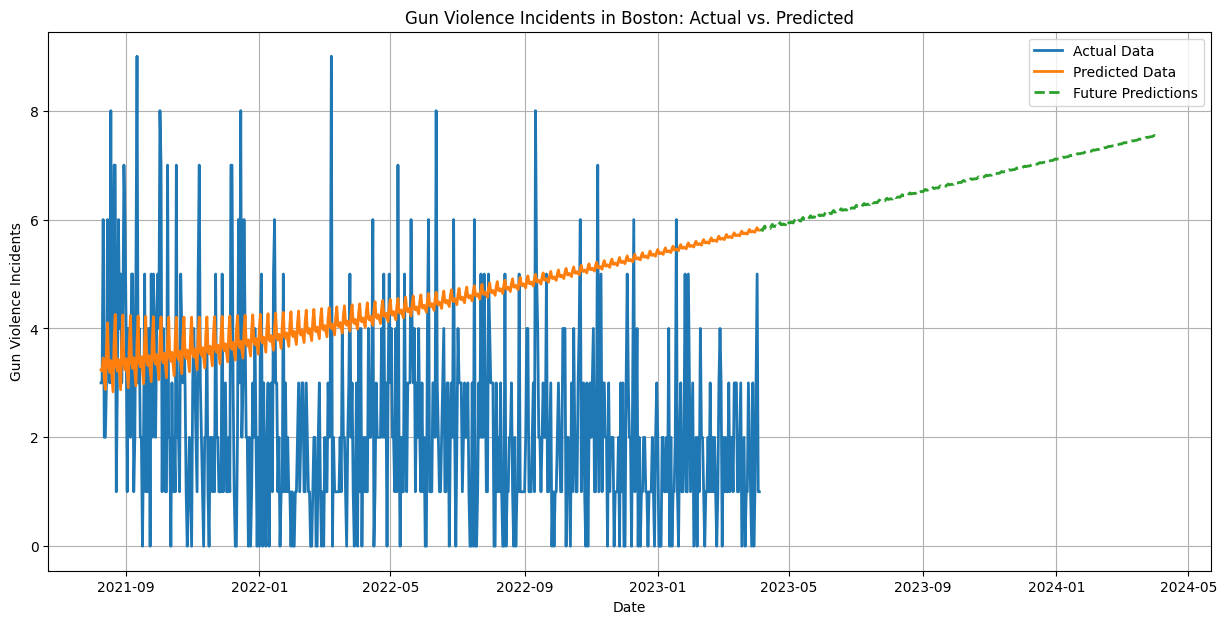

In [237]:
# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(test.index, test, label='Actual Data', linewidth=2)
plt.plot(test.index, predictions, label='Predicted Data', linewidth=2)
plt.plot(future_dates, future_predictions[-future_steps:], label='Future Predictions', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Gun Violence Incidents')
plt.title('Gun Violence Incidents in Boston: Actual vs. Predicted')
plt.legend()
plt.grid()
plt.show()

#Crime Incident Report analysis

## Frequency of Each Type of Firearm-Related Crime

In [12]:
cir15 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir15.csv")
cir16 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir16.csv")
cir17 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir17.csv")
cir18 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir18.csv")
cir19 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir19.csv")
cir20 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir20.csv")
cir21 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir21.csv")
cir22 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir22.csv")

<ipython-input-12-f2150141afda>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cir19 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir19.csv")
<ipython-input-12-f2150141afda>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cir20 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir20.csv")
<ipython-input-12-f2150141afda>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cir21 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir21.csv")
<ipython-input-12-f2150141afda>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cir22 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/crime_incident_report/cir22.csv")


In [13]:
cir = pd.concat([cir15, cir16, cir17, cir18, cir19, cir20, cir21, cir22], ignore_index=True)
cir.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"


In [14]:
# replace the value 'Y' with '1' in the 'SHOOTING' column where the value is 'Y'
cir.loc[cir['SHOOTING'] == 'Y', 'SHOOTING'] = 1
cir = cir.dropna(subset=['SHOOTING', 'Location', 'DISTRICT'])

In [15]:
print(cir['SHOOTING'].value_counts())


0    286418
1      4879
Name: SHOOTING, dtype: int64


In [16]:
cir.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
478,I152050036,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,1,2015-06-16 20:41:00,2015,6,Tuesday,20,Part One,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
479,I152050036,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,1,2015-06-16 20:41:00,2015,6,Tuesday,20,Part One,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
480,I152050036,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,1,2015-06-16 20:41:00,2015,6,Tuesday,20,Part One,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
1296,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,1,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"
1328,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,1,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"


In [17]:
cir['OFFENSE_DESCRIPTION'].unique()

array(['ASSAULT - AGGRAVATED - BATTERY', 'WARRANT ARREST',
       'INTIMIDATING WITNESS',
       'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC', 'VANDALISM',
       'ASSAULT - AGGRAVATED', 'DEATH INVESTIGATION', 'SEARCH WARRANT',
       'PROPERTY - FOUND', 'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
       'ROBBERY - STREET', 'DRUGS - POSS CLASS D',
       'SICK/INJURED/MEDICAL - PERSON', 'BALLISTICS EVIDENCE/FOUND',
       'INVESTIGATE PROPERTY', 'ASSAULT SIMPLE - BATTERY',
       'MISSING PERSON - NOT REPORTED - LOCATED', 'DRUGS - OTHER',
       'OTHER OFFENSE', 'WEAPON - FIREARM - OTHER VIOLATION',
       'FIREARM/WEAPON - FOUND OR CONFISCATED',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'WEAPON - OTHER - OTHER VIOLATION',
       'SERVICE TO OTHER PD INSIDE OF MA.', 'DRUGS - POSS CLASS C',
       'DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP',
       'ROBBERY - HOME INVASION', 'HOME INVASION', 'INVESTIGATE PERSON',
    

In [18]:
violent_crimes = ['WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC', 
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
        'DRUGS - POSS CLASS D',
   		'BALLISTICS EVIDENCE/FOUND',
      'DRUGS - OTHER',
     'WEAPON - FIREARM - OTHER VIOLATION',
       'FIREARM/WEAPON - FOUND OR CONFISCATED',
    'WEAPON - OTHER - OTHER VIOLATION',
       'DRUGS - POSS CLASS C',
       'DRUGS - POSS CLASS B - COCAINE, ETC.',
       'FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH',
       'DRUGS - POSS CLASS A - HEROIN, ETC. ',
       'DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP',
       'KIDNAPPING/CUSTODIAL KIDNAPPING',
       'ABDUCTION - INTICING', 
       'THREATS TO DO BODILY HARM',
       'DRUGS - SICK ASSIST - HEROIN',
       'EXPLOSIVES - TURNED IN OR FOUND',
       'DRUGS - SALE / MANUFACTURING',
       'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
       'BURGLARY - COMMERICAL - FORCE',
       'DRUGS - SICK ASSIST - OTHER HARMFUL DRUG',   
       'DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS', 
       'BURGLARY - OTHER - FORCE',
       'BOMB THREAT', 
		'DRUGS - POSSESSION OF DRUG PARAPHANALIA',
       'Migrated Report - Criminal Homicide',
       'DRUGS - SICK ASSIST - OTHER NARCOTIC',
       'DRUGS - POSS CLASS C - INTENT TO MFR DIST DISP',
       'DRUGS - POSS CLASS E', 'PROPERTY - LOST/ MISSING',
       'DANGEROUS OR HAZARDOUS CONDITION', 
		'ROBBERY - BANK',
        'FUGITIVE FROM JUSTICE',
       'Migrated Report - Burglary/Breaking and Entering',
       'Migrated Report - Drugs - Possession/Manufacturing/Distribute',
       'POSSESSION OF BURGLARIOUS TOOLS',
       'DRUGS - POSS CLASS E - INTENT TO MFR DIST DISP',
       'DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS',
       'DRUGS - POSSESSION', 
       'OPERATING UNDER THE INFLUENCE DRUGS',
       'BURGLARY - COMMERICAL',
       'EXPLOSIVES - POSSESSION OR USE', 
       'WEAPON - FIREARM - SALE / TRAFFICKING',
		'BIOLOGICAL THREATS',
       'WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER',
       'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE', 
       'SICK ASSIST - DRUG RELATED ILLNESS',
       'KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION',
       'FIREARM/WEAPON - LOST',
       'OPERATING UNDER THE INFLUENCE (OUI) DRUGS',
        'Justifiable Homicide',
    'MANSLAUGHTER - NEGLIGENCE',
       'MURDER, NON-NEGLIGENT MANSLAUGHTER',
       'PRISONER ESCAPE / ESCAPE & RECAPTURE']

In [19]:
firearm_crimes = ['WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC', 
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
   		 'BALLISTICS EVIDENCE/FOUND',   
       'WEAPON - FIREARM - OTHER VIOLATION',
       'FIREARM/WEAPON - FOUND OR CONFISCATED',
       'WEAPON - OTHER - OTHER VIOLATION',
       'EXPLOSIVES - TURNED IN OR FOUND',
       'BURGLARY - COMMERICAL - FORCE',
       'BURGLARY - OTHER - FORCE',
       'BOMB THREAT', 
       'FUGITIVE FROM JUSTICE',
       'EXPLOSIVES - POSSESSION OR USE', 
       'KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION',
       'FIREARM/WEAPON - LOST',
       'MURDER, NON-NEGLIGENT MANSLAUGHTER']

In [20]:
firearm_crimes_df = cir[cir['OFFENSE_DESCRIPTION'].isin(firearm_crimes)]


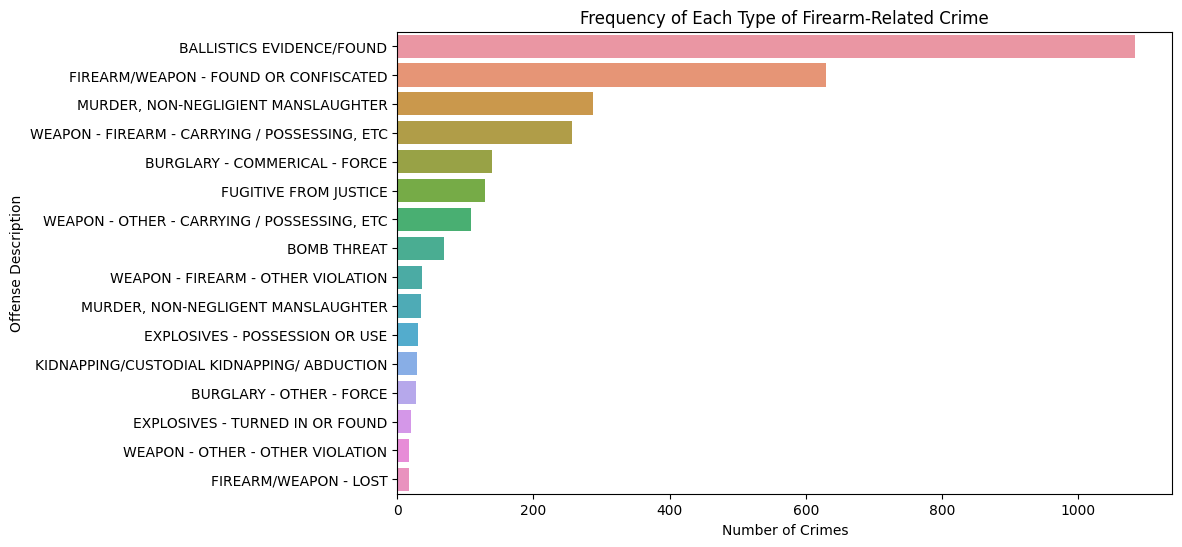

In [21]:
offense_counts = firearm_crimes_df['OFFENSE_DESCRIPTION'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=offense_counts.index, x=offense_counts.values, orient='h')
plt.xlabel('Number of Crimes')
plt.ylabel('Offense Description')
plt.title('Frequency of Each Type of Firearm-Related Crime')
plt.show()


<Figure size 1500x1000 with 0 Axes>

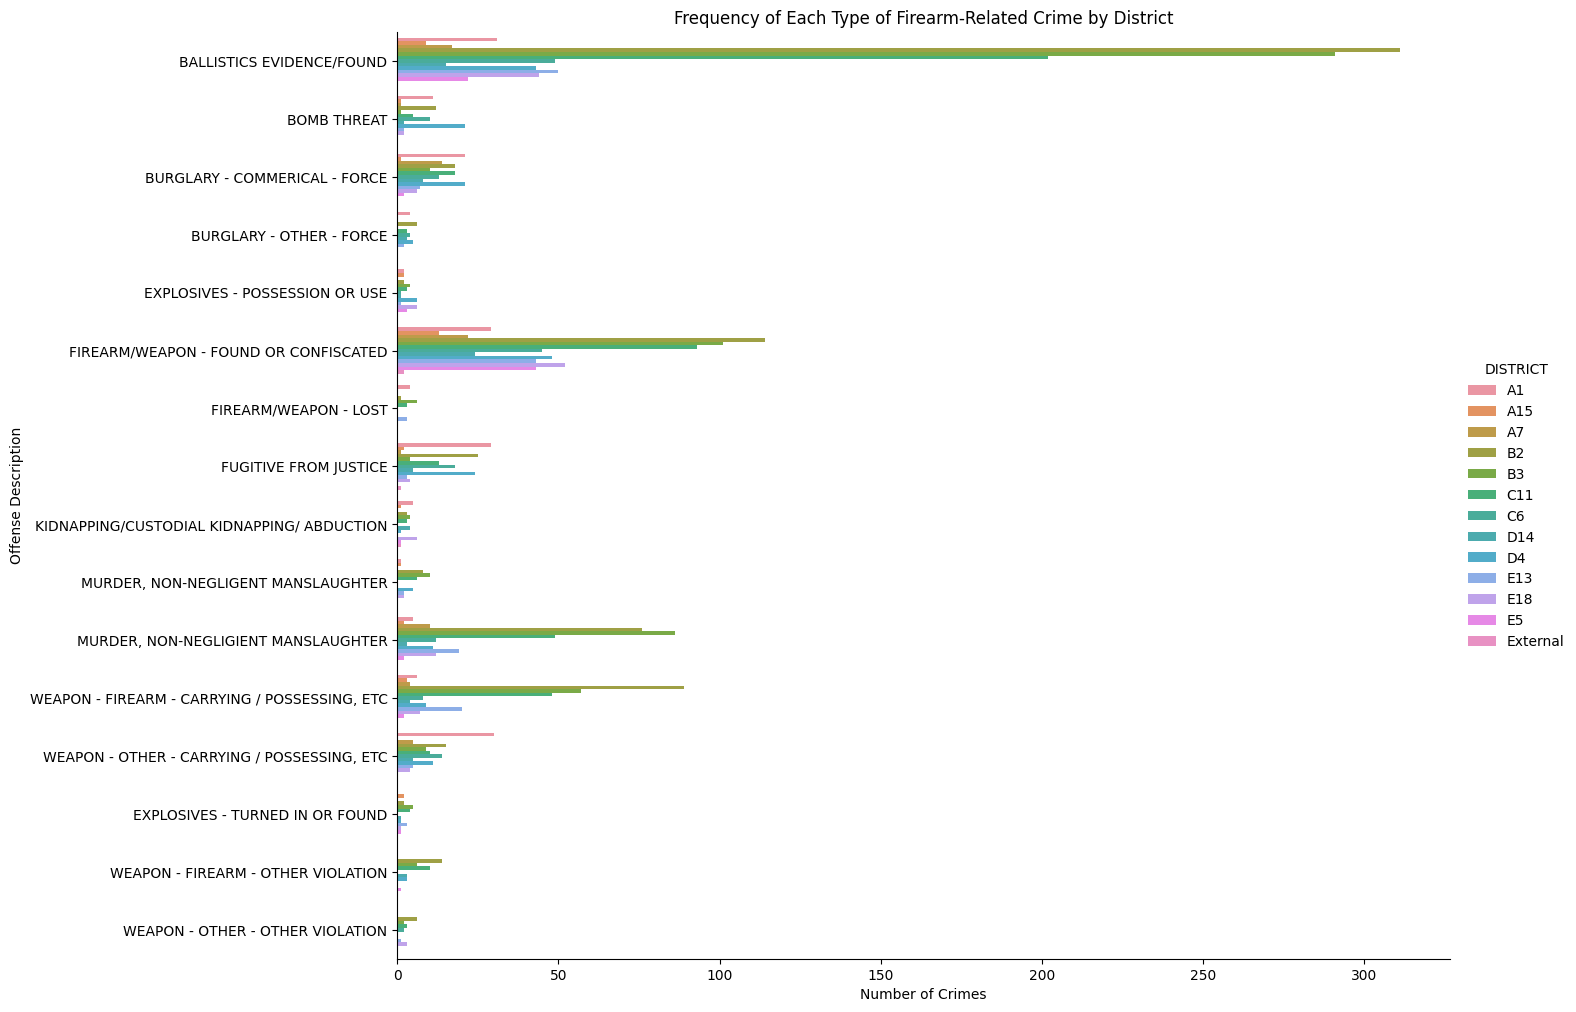

In [22]:
# Group the data by district and offense description, and count the occurrences
district_offense_counts = firearm_crimes_df.groupby(['DISTRICT', 'OFFENSE_DESCRIPTION']).size().reset_index(name='count')

# Create a catplot with the offense description on the y-axis, the count on the x-axis, and separate bars for each district
plt.figure(figsize=(15, 10))
sns.catplot(y='OFFENSE_DESCRIPTION', x='count', hue='DISTRICT', data=district_offense_counts, kind='bar', height=10, aspect=1.5)

plt.xlabel('Number of Crimes')
plt.ylabel('Offense Description')
plt.title('Frequency of Each Type of Firearm-Related Crime by District')
plt.show()


## Shootings by District and Season

In [23]:
firearm_crimes_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1330,I152051161,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B2,238,1,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
1337,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,1,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
4751,I152054787,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,281,1,2015-07-02 23:08:00,2015,7,Thursday,23,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
4752,I152054787,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,281,1,2015-07-02 23:08:00,2015,7,Thursday,23,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
5266,I152055311,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,322,1,2015-07-04 22:47:00,2015,7,Saturday,22,Part One,GLENBURNE ST,42.315122,-71.082520,"(42.31512218, -71.08252020)"


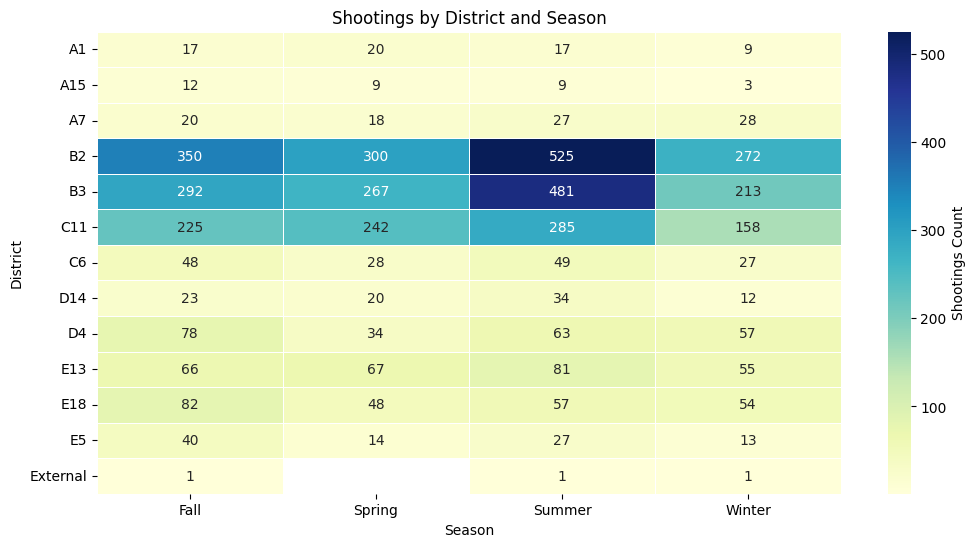

In [24]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

cir['SEASON'] = cir['MONTH'].apply(month_to_season)
shootings = cir[cir['SHOOTING'] == 1]
shootings_by_district_season = shootings.groupby(['DISTRICT', 'SEASON']).size().reset_index(name='COUNT')
pivot = shootings_by_district_season.pivot(index='DISTRICT', columns='SEASON', values='COUNT')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Shootings Count'})
plt.title("Shootings by District and Season")
plt.xlabel("Season")
plt.ylabel("District")
plt.show()



# FIO dataset analysis

In [32]:
fio_original = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/fio_data.csv")

In [33]:
fio_original.shape

(9232, 35)

In [178]:
print(fio_original['city'].value_counts(dropna=False))

BOSTON                4321
DORCHESTER            2237
ROXBURY               1227
JAMAICA PLAIN          363
MATTAPAN               257
EAST BOSTON            214
SOUTH BOSTON           138
HYDE PARK              129
BRIGHTON               111
ROSLINDALE              90
CHARLESTOWN             76
WEST ROXBURY            35
CAMBRIDGE                9
NEWTON                   5
TOWN OF BROOKLINE        4
WALPOLE                  2
BOSOTN                   2
NEEDHAM                  2
BROCKTON                 1
QUINCY                   1
TOWN OF WINCHESTER       1
PROVIDENCE               1
TOWN OF MILTON           1
MARSHFIELD               1
SALEM                    1
WATERTOWN                1
DEDHAM                   1
WALTHAM                  1
Name: city, dtype: int64


In [179]:
print(fio_original['circumstance'].value_counts(dropna=False))

Stopped        6445
Encountered    1899
Observed        888
Name: circumstance, dtype: int64


In [182]:
print(fio_original['basis'].value_counts(dropna=False))


Probable Cause           3550
Reasonable Suspicion     2669
Intel                    1568
Encounter                1434
NaN                        11
Name: basis, dtype: int64


In [183]:
print(fio_original['sex'].value_counts(dropna=False))


Male                          8042
Female                        1167
Male to Female Transgender      11
Unknown                         10
Female to Male Transgender       2
Name: sex, dtype: int64


In [184]:
print(fio_original['race'].value_counts(dropna=False))


Black                                        5894
White                                        2390
Unknown                                       467
NaN                                           238
Other                                         170
Asian                                          68
Native Hawaiian or Other Pacific Islander       5
Name: race, dtype: int64


In [185]:
print(fio_original['age'].value_counts(dropna=False))


22.0    439
21.0    411
18.0    382
20.0    365
29.0    354
       ... 
94.0      1
79.0      1
76.0      1
73.0      1
7.0       1
Name: age, Length: 75, dtype: int64


In [186]:
print(fio_original['city'].value_counts(dropna=False))


BOSTON                4321
DORCHESTER            2237
ROXBURY               1227
JAMAICA PLAIN          363
MATTAPAN               257
EAST BOSTON            214
SOUTH BOSTON           138
HYDE PARK              129
BRIGHTON               111
ROSLINDALE              90
CHARLESTOWN             76
WEST ROXBURY            35
CAMBRIDGE                9
NEWTON                   5
TOWN OF BROOKLINE        4
WALPOLE                  2
BOSOTN                   2
NEEDHAM                  2
BROCKTON                 1
QUINCY                   1
TOWN OF WINCHESTER       1
PROVIDENCE               1
TOWN OF MILTON           1
MARSHFIELD               1
SALEM                    1
WATERTOWN                1
DEDHAM                   1
WALTHAM                  1
Name: city, dtype: int64


In [187]:
print(fio_original['was_frisked'].value_counts(dropna=False))

0.0    5112
1.0    3360
NaN     760
Name: was_frisked, dtype: int64


In [188]:
fio_original['contact_date_x'] = pd.to_datetime(fio_original['contact_date_x'])

# Extract day of the week, month, and year from 'contact_date_x'
fio_original['day_of_week'] = fio_original['contact_date_x'].dt.dayofweek
fio_original['month'] = fio_original['contact_date_x'].dt.month
fio_original['year'] = fio_original['contact_date_x'].dt.year

In [190]:
# Select relevant features
relevant_features = ['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race', 'age', 'city']

# Drop rows with missing values
fio_original.dropna(subset=['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race', 'age', 'city','was_frisked'], inplace=True)
fio_original.shape


(8242, 38)

In [192]:
X = fio_original[relevant_features]
y = fio_original['was_frisked']

In [195]:
print(X.isna().sum())
print(y.isna().sum())

day_of_week     0
month           0
year            0
circumstance    0
basis           0
sex             0
race            0
age             0
city            0
dtype: int64
0


In [194]:
X.head()

,day_of_week,month,year,circumstance,basis,sex,race,age,city
0,5,1,2022,Encountered,Probable Cause,Male,Black,25.0,BOSTON
1,5,1,2022,Encountered,Encounter,Male,Black,39.0,MATTAPAN
3,5,1,2022,Stopped,Reasonable Suspicion,Male,White,54.0,SOUTH BOSTON
4,5,1,2022,Stopped,Reasonable Suspicion,Female,White,44.0,SOUTH BOSTON
5,5,1,2022,Observed,Probable Cause,Female,White,31.0,DORCHESTER


In [197]:
# Define column transformer for pre-processing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race',  'city'])
])

In [198]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with pre-processing and feature selection
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('f_selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model# Train the model
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]  # Get the probability of being frisked


# Add the predicted probabilities to the test dataset
X_test['frisk_probability'] = y_pred_proba

# Calculate the average probability of being frisked for each city
average_frisk_probability_by_city = X_test.groupby('city')['frisk_probability'].mean()

# Print the results
print(average_frisk_probability_by_city)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


city
BOSOTN               0.586887
BOSTON               0.376407
BRIGHTON             0.258485
CAMBRIDGE            0.169983
CHARLESTOWN          0.337964
DORCHESTER           0.492733
EAST BOSTON          0.375806
HYDE PARK            0.395176
JAMAICA PLAIN        0.326308
MARSHFIELD           0.280230
MATTAPAN             0.482225
NEWTON               0.128457
ROSLINDALE           0.300322
ROXBURY              0.327114
SOUTH BOSTON         0.451555
TOWN OF BROOKLINE    0.001481
WATERTOWN            0.488063
WEST ROXBURY         0.140626
Name: frisk_probability, dtype: float64

Accuracy: 0.6579745300181928
F1 Score: 0.5942446043165467

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.70       960
         1.0       0.59      0.60      0.59       689

    accuracy                           0.66      1649
   macro avg       0.65      0.65      0.65      1649
weighted avg       0.66      0.66      0.66      1649



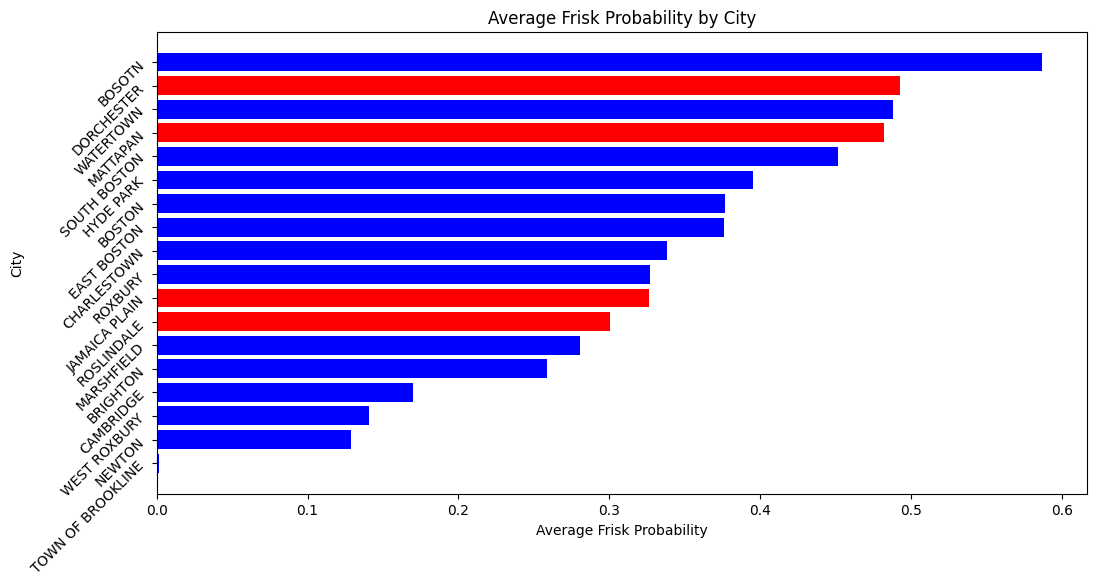

In [202]:
# Sort the average_frisk_probability_by_city DataFrame
sorted_average_frisk_probability = average_frisk_probability_by_city.sort_values(ascending=True)

# Define a list of cities for which you want to highlight the bars in red
cities_to_highlight = ['DORCHESTER', 'MATTAPAN', 'ROSLINDALE', 'JAMAICA PLAIN']

# Create a color map dictionary where the bars of cities to highlight are in red and others in blue
colors = {city: 'r' if city in cities_to_highlight else 'b' for city in sorted_average_frisk_probability.index}

# Create a horizontal bar chart of the average frisk probability by city
plt.figure(figsize=(12, 6))
plt.barh(sorted_average_frisk_probability.index, sorted_average_frisk_probability.values, color=[colors[city] for city in sorted_average_frisk_probability.index])
plt.xlabel('Average Frisk Probability')
plt.yticks(rotation=45)  # Rotate the y-axis labels to avoid overlapping
plt.ylabel('City')
plt.title('Average Frisk Probability by City')
plt.show()



In [203]:
fio = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/fio_firearm_cleaned.csv")

In [204]:
fio.head()

,fc_num,contact_date_x,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,build,hair_style,ethnicity,skin_tone,deceased,license_type,license_state,was_frisked,hour,time_period
0,FC22000001,1/1/2022 2:30,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,DORCHESTER,MA,2122,...,Thin,Short,Not of Hispanic Origin,Brown,0,Personal Driver License,MA,1.0,2,Night
1,FC22000004,1/1/2022 9:29,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Medium,Bald or Balding,Not of Hispanic Origin,Medium Brown,0,Class D,MA,1.0,9,Morning
2,FC22000004,1/1/2022 9:29,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,NaN,9,Morning
3,FC22000007,1/1/2022 19:35,90495,"FLAVEN, MICHAEL",11827,MICHAEL MYLETT,GEORGETOWNE DR,HYDE PARK,MA,2136,...,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,1.0,19,Evening
4,FC22000007,1/1/2022 19:35,90495,"FLAVEN, MICHAEL",11827,MICHAEL MYLETT,GEORGETOWNE DR,HYDE PARK,MA,2136,...,NaN,NaN,Not of Hispanic Origin,NaN,0,NaN,MA,0.0,19,Evening


In [205]:
fio.columns

Index(['fc_num', 'contact_date_x', 'contact_officer', 'contact_officer_name',
       'supervisor', 'supervisor_name', 'street', 'city', 'state', 'zip',
       'stop_duration', 'circumstance', 'basis', 'vehicle_year',
       'vehicle_state', 'vehicle_model', 'vehicle_color', 'vehicle_style',
       'vehicle_type', 'key_situations', 'contact_reason', 'weather',
       'person_id', 'contact_date_y', 'sex', 'race', 'age', 'build',
       'hair_style', 'ethnicity', 'skin_tone', 'deceased', 'license_type',
       'license_state', 'was_frisked', 'hour', 'time_period'],
      dtype='object')

In [206]:
print(fio.iloc[2,:])

fc_num                                                         FC22000004
contact_date_x                                              1/1/2022 9:29
contact_officer                                                    148290
contact_officer_name                                      PARHAM, ANTHONY
supervisor                                                          10845
supervisor_name                                               JAMES MOORE
street                                                         BRIARCLIFF
city                                                             MATTAPAN
state                                                                  MA
zip                                                                  2126
stop_duration                                                        17.0
circumstance                                                  Encountered
basis                                                           Encounter
vehicle_year                          

In [207]:
fio.shape

(1278, 37)

In [208]:
fio['city'].value_counts(dropna=False)

DORCHESTER           586
ROXBURY              301
BOSTON               133
MATTAPAN              53
JAMAICA PLAIN         52
ROSLINDALE            50
EAST BOSTON           46
CHARLESTOWN           20
SOUTH BOSTON          13
BRIGHTON              10
HYDE PARK              7
WEST ROXBURY           3
TOWN OF BROOKLINE      2
PROVIDENCE             1
MARSHFIELD             1
Name: city, dtype: int64

In [209]:
fio = fio[fio['city'] != 'BRIGHTON']


In [210]:
fio['circumstance'].value_counts(dropna=False)

Stopped        1003
Encountered     170
Observed         95
Name: circumstance, dtype: int64

In [211]:
fio['basis'].value_counts(dropna=False)

Probable Cause           546
Reasonable Suspicion     371
Intel                    206
Encounter                140
NaN                        5
Name: basis, dtype: int64

In [212]:
fio['race'].value_counts(dropna=False)

Black                                        937
White                                        212
Unknown                                       43
NaN                                           36
Other                                         33
Asian                                          6
Native Hawaiian or Other Pacific Islander      1
Name: race, dtype: int64

In [213]:
fio['sex'].value_counts(dropna=False)

Male                          1128
Female                         139
Male to Female Transgender       1
Name: sex, dtype: int64

In [214]:
# Remove the row with "Male to Female Transgender" in the 'sex' column
fio = fio[fio['sex'] != 'Male to Female Transgender']
fio['sex'].value_counts(dropna=False)

Male      1128
Female     139
Name: sex, dtype: int64

In [215]:
fio['was_frisked'].value_counts(dropna=False)

1.0    625
0.0    512
NaN    130
Name: was_frisked, dtype: int64

In [216]:
fio['contact_date_x'] = pd.to_datetime(fio['contact_date_x'])

# Extract day of the week, month, and year from 'contact_date_x'
fio['day_of_week'] = fio['contact_date_x'].dt.dayofweek
fio['month'] = fio['contact_date_x'].dt.month
fio['year'] = fio['contact_date_x'].dt.year

<ipython-input-216-2b92189e9c9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fio['contact_date_x'] = pd.to_datetime(fio['contact_date_x'])
<ipython-input-216-2b92189e9c9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fio['day_of_week'] = fio['contact_date_x'].dt.dayofweek
<ipython-input-216-2b92189e9c9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [217]:
# Select relevant features
relevant_features = ['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race', 'age',  'time_period', 'city']

# Drop rows with missing values
fio.dropna(subset=['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race', 'age',  'time_period', 'city','was_frisked'], inplace=True)
fio.shape


(1099, 40)

In [218]:
X = fio[relevant_features]
y = fio['was_frisked']

In [219]:
X.head()

,day_of_week,month,year,circumstance,basis,sex,race,age,time_period,city
0,5,1,2022,Encountered,Probable Cause,Male,Black,25,Night,DORCHESTER
1,5,1,2022,Encountered,Encounter,Male,Black,39,Morning,MATTAPAN
3,5,1,2022,Stopped,Reasonable Suspicion,Male,Black,40,Evening,HYDE PARK
4,5,1,2022,Stopped,Reasonable Suspicion,Female,Black,41,Evening,HYDE PARK
5,5,1,2022,Stopped,Reasonable Suspicion,Female,Black,38,Evening,HYDE PARK


In [220]:
print(X.isna().sum())

day_of_week     0
month           0
year            0
circumstance    0
basis           0
sex             0
race            0
age             0
time_period     0
city            0
dtype: int64


In [221]:
# Define column transformer for pre-processing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['day_of_week', 'month', 'year', 'circumstance', 'basis', 'sex', 'race',  'time_period', 'city'])
])

In [222]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with pre-processing and feature selection
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('f_selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model# Train the model
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]  # Get the probability of being frisked


# Add the predicted probabilities to the test dataset
X_test['frisk_probability'] = y_pred_proba

# Calculate the average probability of being frisked for each city
average_frisk_probability_by_city = X_test.groupby('city')['frisk_probability'].mean()

# Print the results
print(average_frisk_probability_by_city)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


city
BOSTON           0.338811
CHARLESTOWN      0.170000
DORCHESTER       0.611036
EAST BOSTON      0.503797
HYDE PARK        0.766500
JAMAICA PLAIN    0.742909
MATTAPAN         0.602282
ROSLINDALE       0.615663
ROXBURY          0.549537
SOUTH BOSTON     0.263714
Name: frisk_probability, dtype: float64

Accuracy: 0.6818181818181818
F1 Score: 0.7265625

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.58      0.62        99
         1.0       0.69      0.77      0.73       121

    accuracy                           0.68       220
   macro avg       0.68      0.67      0.67       220
weighted avg       0.68      0.68      0.68       220



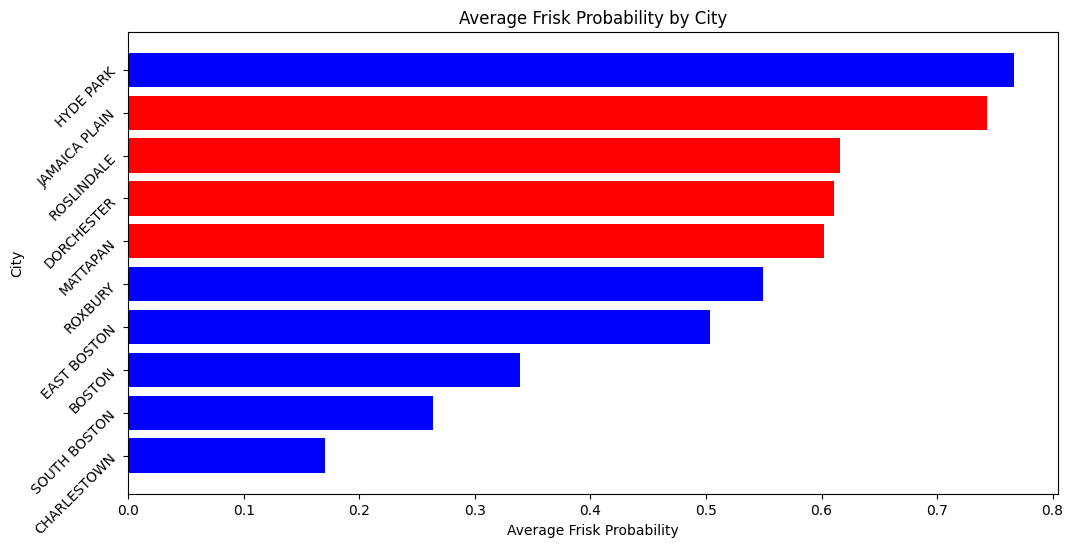

In [223]:
# Sort the average_frisk_probability_by_city DataFrame
sorted_average_frisk_probability = average_frisk_probability_by_city.sort_values(ascending=True)

# Define a list of cities for which you want to highlight the bars in red
cities_to_highlight = ['DORCHESTER', 'MATTAPAN', 'ROSLINDALE', 'JAMAICA PLAIN']

# Create a color map dictionary where the bars of cities to highlight are in red and others in blue
colors = {city: 'r' if city in cities_to_highlight else 'b' for city in sorted_average_frisk_probability.index}

# Create a horizontal bar chart of the average frisk probability by city
plt.figure(figsize=(12, 6))
plt.barh(sorted_average_frisk_probability.index, sorted_average_frisk_probability.values, color=[colors[city] for city in sorted_average_frisk_probability.index])
plt.xlabel('Average Frisk Probability')
plt.yticks(rotation=45)  # Rotate the y-axis labels to avoid overlapping
plt.ylabel('City')
plt.title('Average Frisk Probability by City')
plt.show()



In [6]:
fio_original1 = pd.read_csv("/content/drive/MyDrive/CS506 Gun Violence/data/fio_data.csv")

In [7]:
fio_original1.loc[2, 'contact_reason']

'About 10:00AM, Saturday 1/1/21 Officers responded to a XXXat XXX Briarcliff Terr. Mattapan. \n\nThe XXXinvolved the suspect XXXseveral previous firearm charges, 209A charges and Assault and Battery on Police. XXXwas seated in the passenger side of a blue Jeep Cherokee bearing MA reg: XXX\n\nThe vehicle was a rented by the victim(XXX). XXXstated on scene that XXXtook her vehicle without permission and has done it in the past.'

In [8]:
fio_original1.columns

Index(['fc_num', 'contact_date_x', 'contact_officer', 'contact_officer_name',
       'supervisor', 'supervisor_name', 'street', 'city', 'state', 'zip',
       'stop_duration', 'circumstance', 'basis', 'vehicle_year',
       'vehicle_state', 'vehicle_model', 'vehicle_color', 'vehicle_style',
       'vehicle_type', 'key_situations', 'contact_reason', 'weather',
       'person_id', 'contact_date_y', 'sex', 'race', 'age', 'build',
       'hair_style', 'ethnicity', 'skin_tone', 'deceased', 'license_type',
       'license_state', 'was_frisked'],
      dtype='object')

In [9]:
def is_gun_related(text):
    gun_keywords = ['gun', 'firearm', 'shot', 'shooting', 'weapon']
    if pd.isna(text):
        return 0
    for keyword in gun_keywords:
        if keyword.lower() in text.lower():
            return 1
    return 0

fio_original1['gun_violence_incident'] = fio_original1['key_situations'].apply(is_gun_related) | fio_original1['contact_reason'].apply(is_gun_related)


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a function to preprocess the contact_reason column
def preprocess_contact_reason(contact_reason):
    if pd.isna(contact_reason):
        return ""
    else:
        return contact_reason

# Preprocess the contact_reason column
fio_original1['contact_reason'] = fio_original1['contact_reason'].apply(preprocess_contact_reason)

# Define the target variable (gun violence incident) - assuming you have a column 'gun_violence_incident' with 0/1 values
y = fio_original1['gun_violence_incident']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(fio_original1['contact_reason'], y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9566865186789388
Confusion Matrix:
 [[1484   15]
 [  65  283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1499
           1       0.95      0.81      0.88       348

    accuracy                           0.96      1847
   macro avg       0.95      0.90      0.92      1847
weighted avg       0.96      0.96      0.96      1847



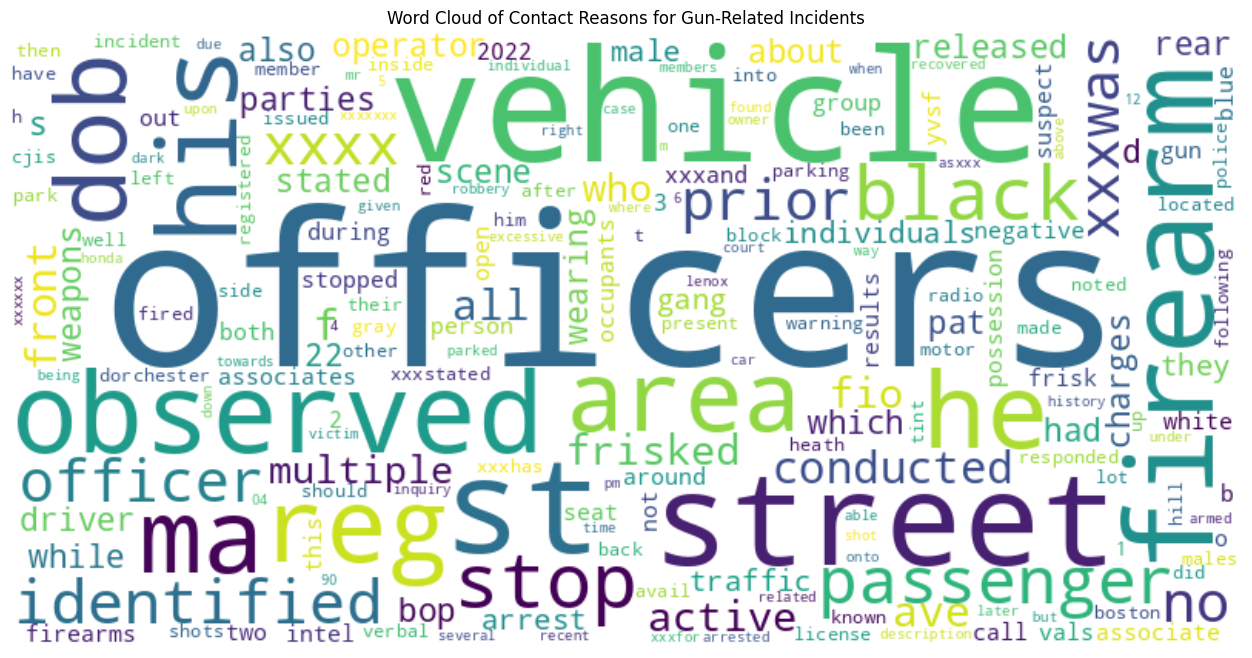

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Create a function to clean and tokenize the contact_reason text
def tokenize(text):
    words = re.findall(r'\w+', text.lower())
    return words

# Filter the data to only gun-related incidents
gun_related_data = fio_original1[fio_original1['gun_violence_incident'] == 1]

# Concatenate all the contact_reason text from gun-related incidents
all_text = ' '.join(gun_related_data['contact_reason'])

# Tokenize the text and count the word occurrences
words = tokenize(all_text)
word_counts = Counter(words)

# Remove common stopwords
stopwords = {"a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "in", "is", "it", "of", "on", "or", "that", "the", "to", "was", "were", "will", "with", "xxx", "xx"}
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate_from_frequencies(filtered_word_counts)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Contact Reasons for Gun-Related Incidents')
plt.show()
